In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Data.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

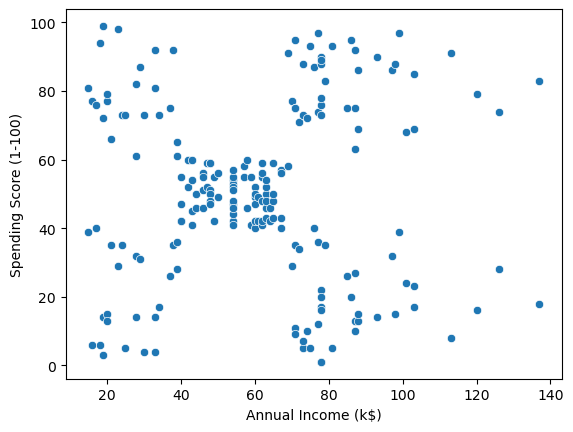

In [4]:
sns.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'])

In [5]:
x.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
x.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [7]:
x.duplicated().sum()

4

In [8]:
x[x.duplicated(keep=False)]

,Annual Income (k$),Spending Score (1-100)
48,40,42
49,40,42
65,48,59
68,48,59
129,71,75
131,71,75
156,78,1
158,78,1


In [9]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [10]:
#Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [14]:
x

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [15]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans()

cluster = km.fit_predict(x)

In [17]:
cluster

array([5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 6, 0, 6, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 1, 1, 6, 6, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7,
       4, 7])

In [18]:
x

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


# Elbow Graph

In [19]:
import warnings 

warnings.filterwarnings('ignore')

In [20]:
wcss = []


for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [21]:
wcss

[400.0,
 270.66820496844673,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.067795914519664,
 44.91118554999014,
 37.18200328717295,
 32.36022982569204,
 29.26820529358408,
 26.441200778545788,
 23.45047142458371,
 21.084158216357018,
 19.344606159085675,
 18.14344600063366,
 16.245085417689108,
 15.134783431355611,
 13.779185201529362,
 12.965405368928367]

Text(0, 0.5, 'WCSS')

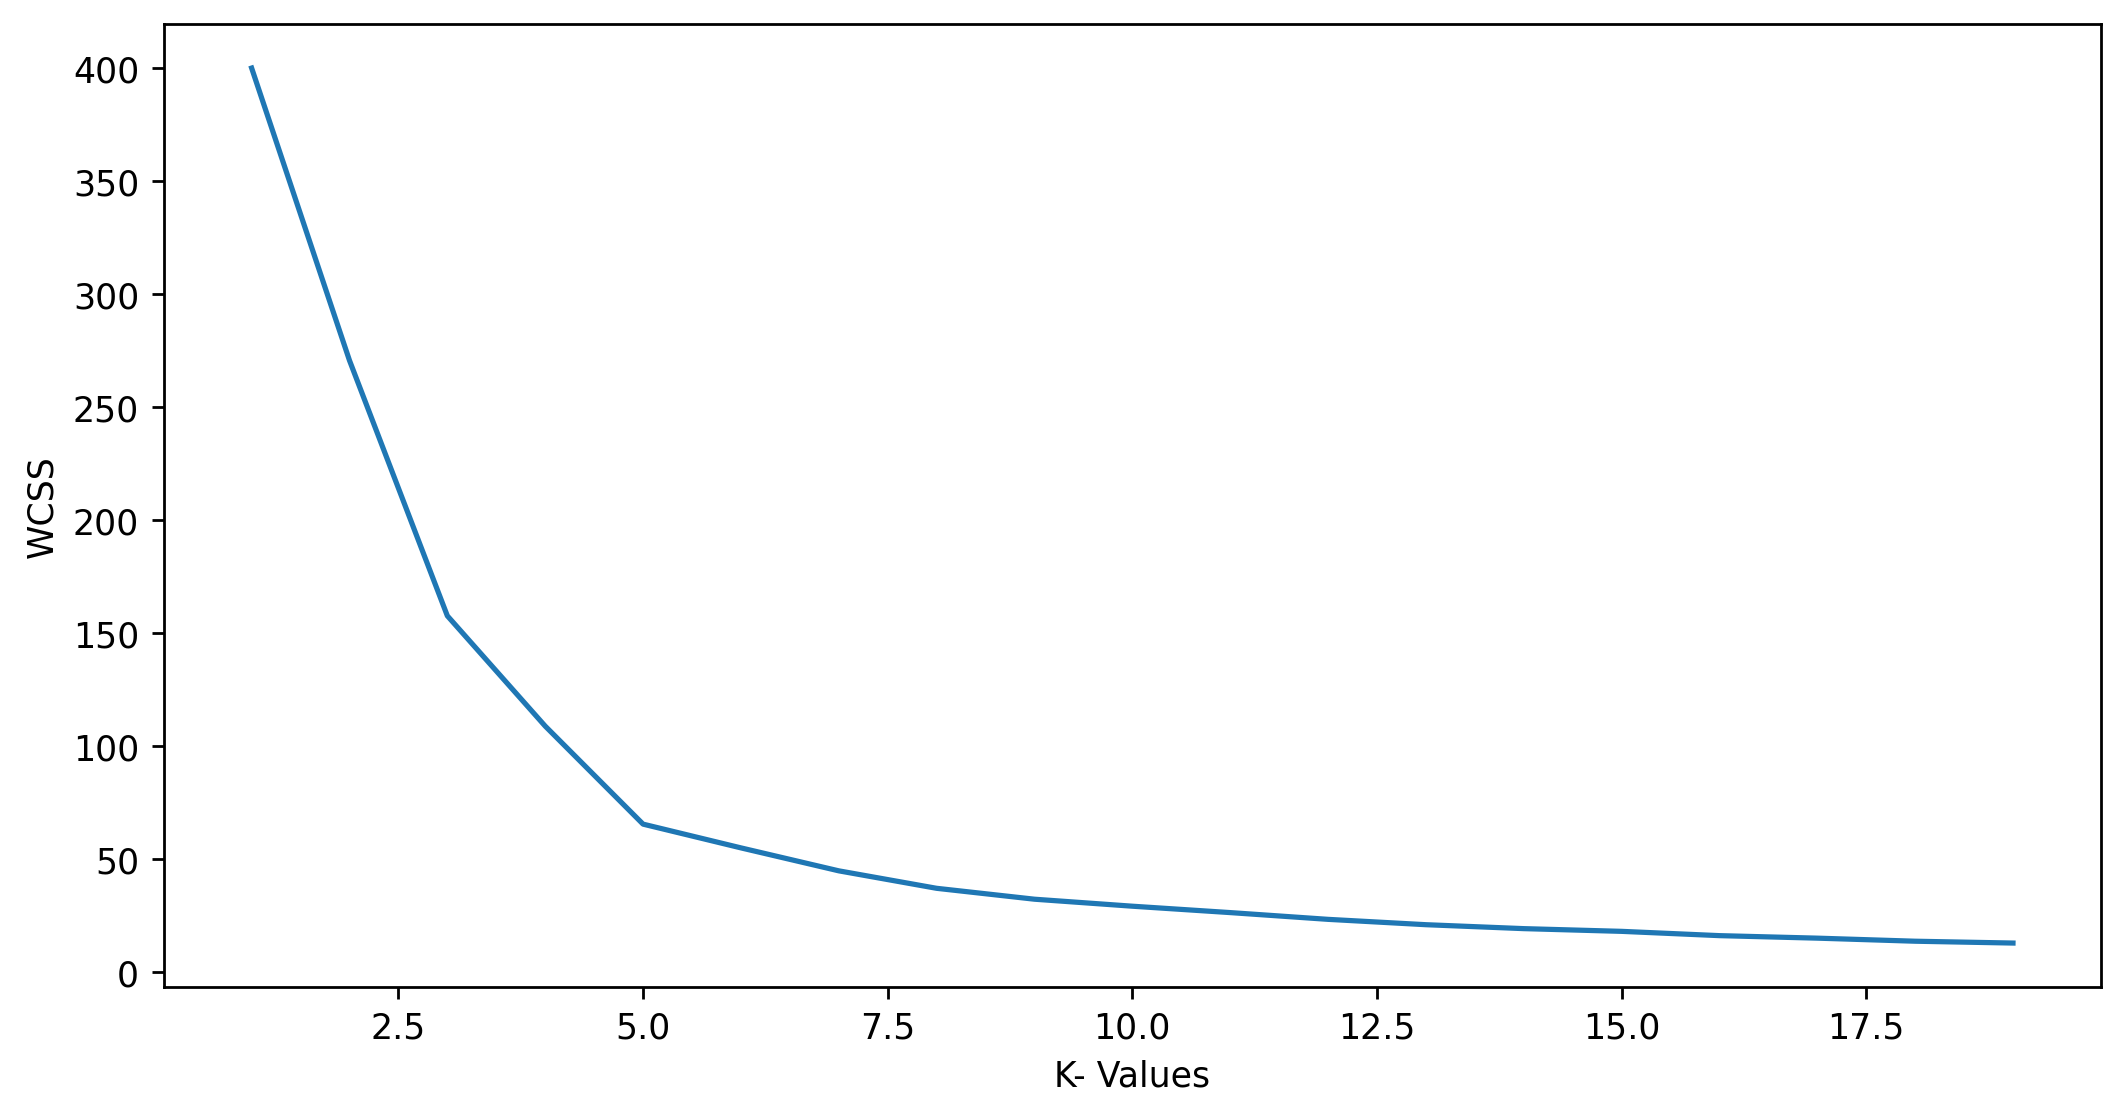

In [22]:
plt.plot(range(1,20), wcss)
plt.xlabel('K- Values')
plt.ylabel('WCSS')

# Model Building with K=5

In [23]:
km = KMeans(n_clusters=5)
ylabel = km.fit_predict(x)

In [24]:
ylabel

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [25]:
km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788]])

In [26]:
x['Cluster'] = ylabel

In [27]:
x

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,3
197,2.497807,0.923953,1
198,2.917671,-1.250054,3


In [28]:
km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788]])

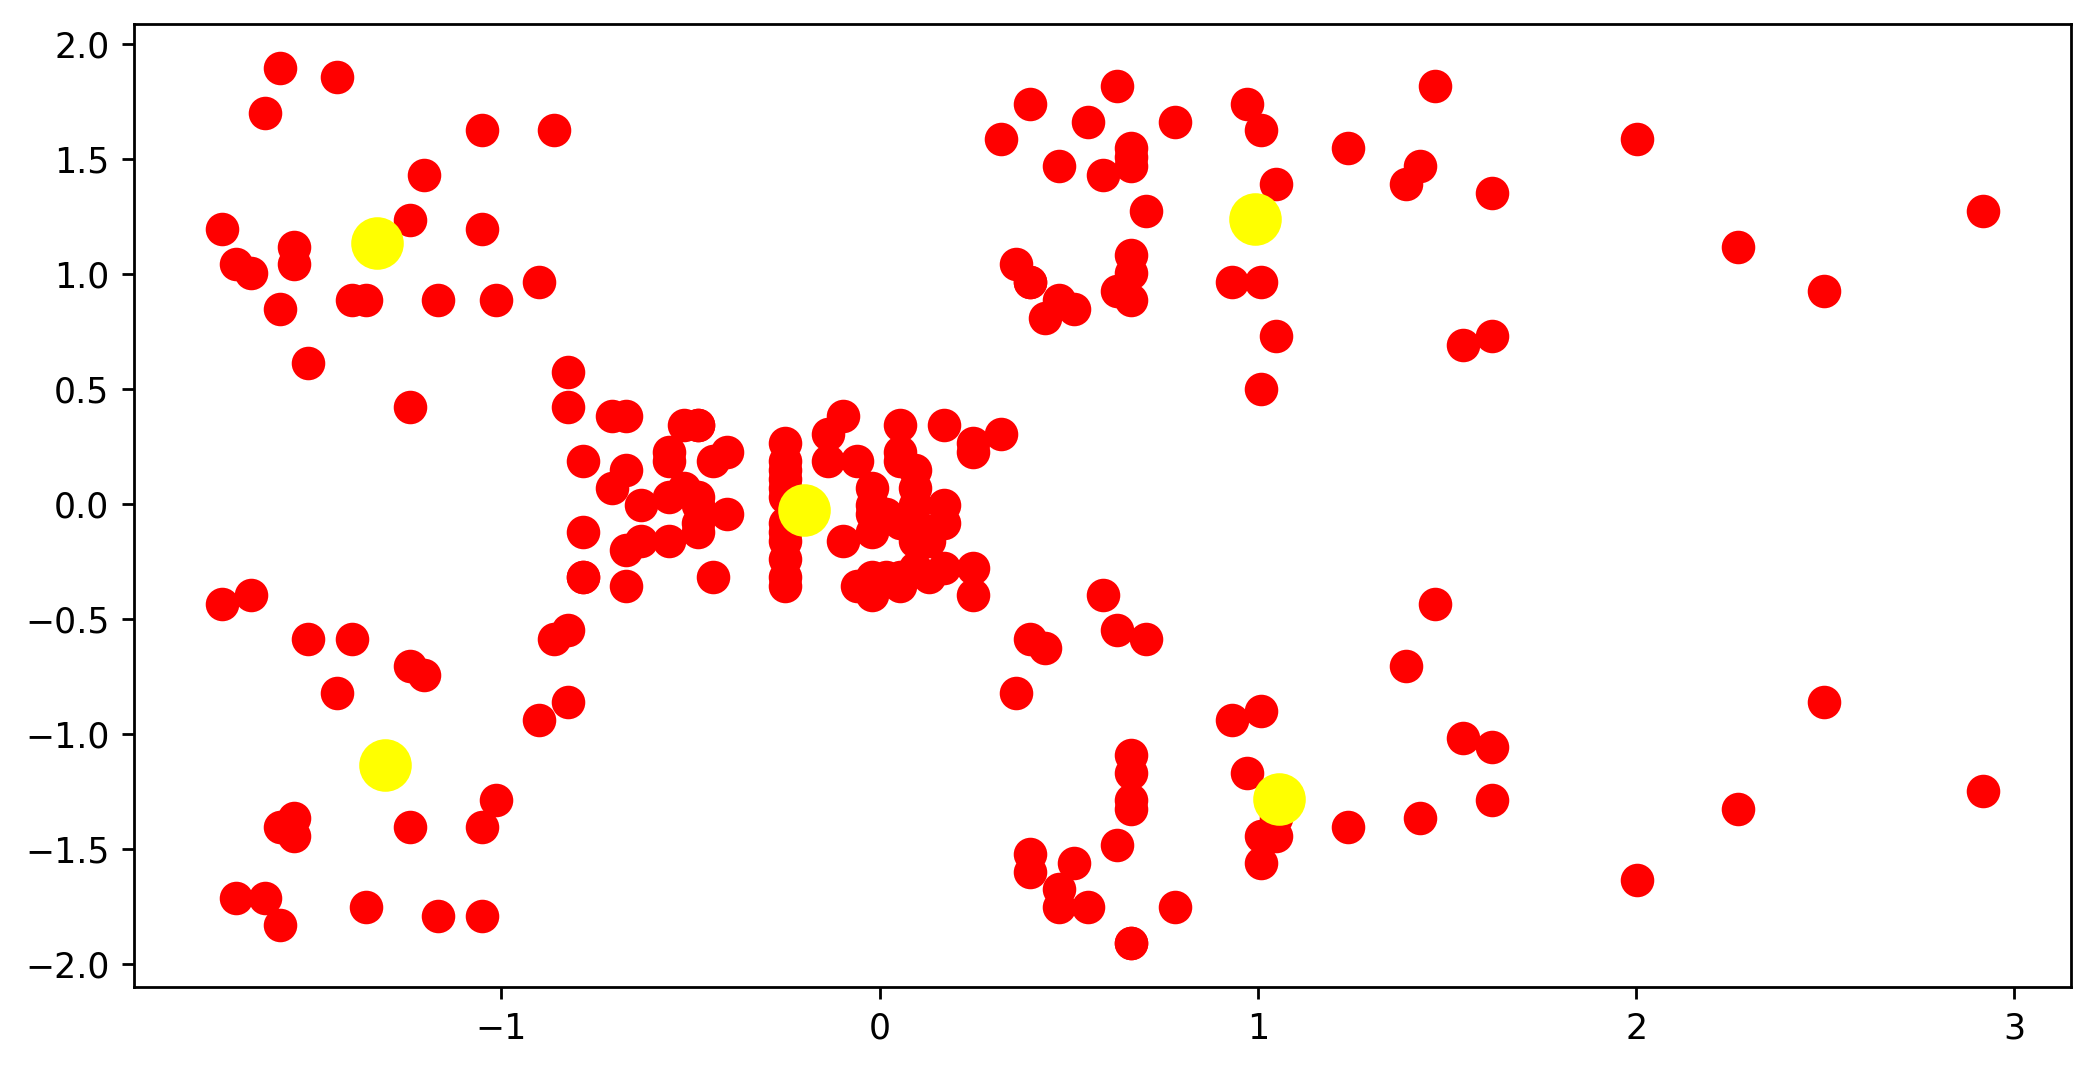

In [29]:
plt.scatter(x.iloc[:,0], x.iloc[:,1],c ='r',cmap='rainbow' s = 75)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'yellow', s = 200)

In [30]:
df.drop(columns=['CustomerID'], inplace=True)

In [32]:
df['Cluster'] = ylabel

In [33]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


In [34]:
df.groupby('Cluster').agg('mean')

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,42.716049,55.296296,49.518519
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
x

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,4
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,4
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,3
197,2.497807,0.923953,1
198,2.917671,-1.250054,3


In [38]:
x1 = x.iloc[:,:2]
y = x.iloc[:,-1]

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.2, random_state=1)

In [40]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      1.00      1.00         5
           2       0.81      1.00      0.90        13
           3       1.00      1.00      1.00         9
           4       1.00      0.80      0.89         5

    accuracy                           0.93        40
   macro avg       0.96      0.91      0.93        40
weighted avg       0.94      0.93      0.92        40

